<a href="https://colab.research.google.com/github/bray2020/AI-works/blob/main/Fuel_Efficiency_Prediction_using_FFNN_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This is an automobile dataset to predict the fuel efficiency , 'MPG'

**Technical aspects:**
- Perform appropriate exploratory data analysis technique to treat missing values, to
visualize the required plot etc.
- Divide the data into train and test set with 80:20 ratio.
- Perform appropriate normalization technique.
- Build the NN model with adequate number of hidden layers, appropriate optimizer and
loss functions.
- Display the model summary and give your explanation on number of trainable
parameters.
- Fit the model by taking validation data as 20% of training data.
- Plot the graph of Number of epochs vs/ training and validation loss
- Check whether any overfitting is there in the model. If yes, apply early stopping
technique to avoid it.
- Evaluate the model and predict it on testing data.
- Draw a graph of actual values v/s predicted values (regression line and scatter plot)

**Importing necessary packages:**

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
from   tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras import layers

**Load the data and store it into a dataframe, named 'dataset' as mentioned:**

In [2]:
dataset_path = keras.utils.get_file("auto-mpg.data", "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight', 'Acceleration', 'Model Year', 'Origin'] 
dataset = pd.read_csv(dataset_path, names=column_names, na_values = "?", comment='\t', sep=" ", skipinitialspace=True)

**Basic Data Exploration, Misisng value treatment and Visualization**

In [3]:
dataset.shape

(398, 8)

- The dataset is having 398 rows and 8 columns including the traget column, 'MPG'

In [4]:
#Displaying first 5 records
dataset.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [5]:
#Displaying basic data summary: columns, data types, null values present or not etc
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    float64
 1   Cylinders     398 non-null    int64  
 2   Displacement  398 non-null    float64
 3   Horsepower    392 non-null    float64
 4   Weight        398 non-null    float64
 5   Acceleration  398 non-null    float64
 6   Model Year    398 non-null    int64  
 7   Origin        398 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 25.0 KB


- From above information it seems that only the feature 'Horsepower' has 6 missing values 

**Missing value treatment:**

In [6]:
print('Total Missing values:', dataset.isnull().sum())
print()
print('Missing value percentage is:', round(((dataset['Horsepower'].isnull().sum()/dataset.shape[0])*100), 2))

Total Missing values: MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

Missing value percentage is: 1.51


- As the percentage of missing value is low, hence proceeding with dropping the missing values as of now

In [7]:
dataset.dropna(inplace=True)
dataset.isnull().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [8]:
#visualizing the features:
dataset.columns

Index(['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
       'Acceleration', 'Model Year', 'Origin'],
      dtype='object')

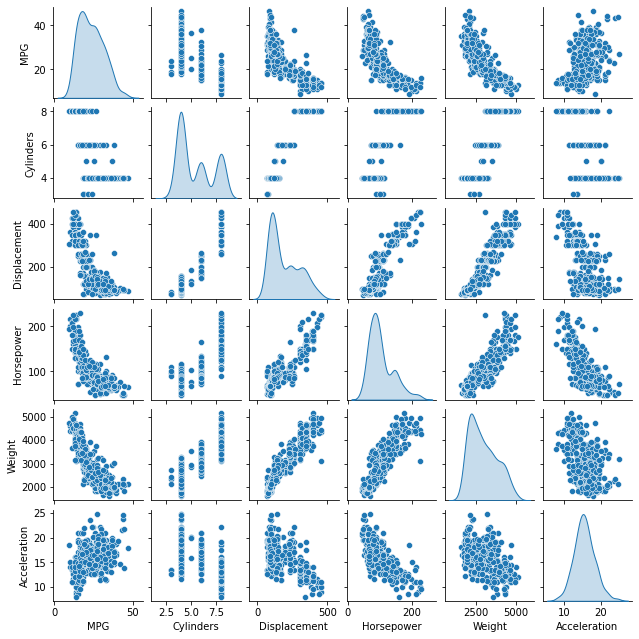

In [9]:
sns.pairplot(dataset[['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration']], height = 1.5, diag_kind="kde")
plt.show();

**Divide the data into train set and test set (80:20 ratio):**

In [10]:
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset =  dataset.drop(train_dataset.index)

In [11]:
#Take the transpose of all the input features decription/summary data:
train_stats = train_dataset.describe()
train_stats.pop('MPG')
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Cylinders,314.0,5.477707,1.699788,3.0,4.00,4.0,8.00,8.0
Displacement,314.0,195.318471,104.331589,68.0,105.50,151.0,265.75,455.0
Horsepower,314.0,104.869427,38.096214,46.0,76.25,94.5,128.00,225.0
Weight,314.0,2990.251592,843.898596,1649.0,2256.50,2822.5,3608.00,5140.0
Acceleration,314.0,15.559236,2.789230,8.0,13.80,15.5,17.20,24.8
Model Year,314.0,75.898089,3.675642,70.0,73.00,76.0,79.00,82.0
Origin,314.0,1.573248,0.800988,1.0,1.00,1.0,2.00,3.0


**Split the input features from the target/label column:**
- Separating the target/label column 'MPG' from the input features of both train and test sets.

In [12]:
train_labels = train_dataset.pop('MPG')    
test_labels = test_dataset.pop('MPG')   

**Normalize the data: Applied Standardization technique to normalize the data**

In [13]:
def norm(x):
  return (x- train_stats['mean']) / train_stats['std']

normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

**FFNN (MLP architecture) Model Building:**
- Considered 2 hidden layers
- The 1st hidden layer has 50 neurons, input shape is=(7, ) because 7 input features and each feature is a 1-D column vector. Activation function used 'relu'
- The 2nd hidden layer also has 50 neurons. The same activation function 'relu' is used in this layer as well
- The last layer is the output layer, no activation func is needed cause it is a regression problem. So, the output/target 'y' can take value ranging from -infinity to +infinity
- For loss optimization 'RMSprop' is used with default learning rate
- Loss functions is Mean Squared Error ('mse')
- Model performance matrics used 'Mean Absolute Error' and 'Mean Squared Error'

In [14]:
def build_model():

  model = keras.Sequential([
                            layers.Dense(50, activation="relu", input_shape=[len(train_dataset.keys())]),   
                            layers.Dense(50, activation="relu"),                                             
                            layers.Dense(1)                                                                 
                            ])
  
  optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001)   

  model.compile(loss="mse",                                      
                optimizer=optimizer,
                metrics=['mae','mse'])
  
  return model

In [15]:
#creating the model objcet: 
model = build_model()

**Displaying the model summary:**

In [16]:
#print the model summary:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                400       
_________________________________________________________________
dense_1 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 51        
Total params: 3,001
Trainable params: 3,001
Non-trainable params: 0
_________________________________________________________________


- There are total 3001 trainable parameters in this NN (therefore, total weights and bias is 3001)
- Calculation of the trainable parameters in the layers are as following:
- 1st hidden layer total 400 trainable parameters (7*50+50 = 400)
- 2nd hidden layer total 2550 trainable parameters (50*50+50 = 2550)
- output layer total 51 trainable parameters (50*1+1 = 51)

**Train the model by taking validation data as 20% of training set:**
- validation set taken as 20% of the training data
- number of epochs = 500
- and 'verbose=1' to display the details of the model (loss, performance metrics etc at each epoch)

In [17]:
#display training progress by printing a single dot for each complete epoch
class PrintDot(keras.callbacks.Callback):
  def op_epoch_end(self,epoch,logs):
    if epoch % 100 ==0:
      print('')
    print(".",end='')

EPOCHS = 500

history = model.fit(
    normed_train_data, train_labels,
    epochs=EPOCHS, validation_split = 0.2, verbose=1)

Epoch 1/500
8/8 [==============================] - 1s 68ms/step - loss: 571.5505 - mae: 22.6609 - mse: 571.5505 - val_loss: 567.8807 - val_mae: 22.4812 - val_mse: 567.8807
Epoch 2/500
8/8 [==============================] - 0s 8ms/step - loss: 561.9115 - mae: 22.3230 - mse: 561.9115 - val_loss: 525.3059 - val_mae: 21.4908 - val_mse: 525.3059
Epoch 3/500
8/8 [==============================] - 0s 7ms/step - loss: 453.5661 - mae: 19.9038 - mse: 453.5661 - val_loss: 479.3463 - val_mae: 20.4079 - val_mse: 479.3463
Epoch 4/500
8/8 [==============================] - 0s 8ms/step - loss: 443.9520 - mae: 19.6350 - mse: 443.9520 - val_loss: 431.4598 - val_mae: 19.2209 - val_mse: 431.4598
Epoch 5/500
8/8 [==============================] - 0s 8ms/step - loss: 380.2824 - mae: 18.0248 - mse: 380.2824 - val_loss: 381.2573 - val_mae: 17.9051 - val_mse: 381.2573
Epoch 6/500
8/8 [==============================] - 0s 7ms/step - loss: 337.2828 - mae: 16.8948 - mse: 337.2828 - val_loss: 328.8421 - val_mae: 1

**Storing the model run details into a dataframe, named 'hist' here:**

In [18]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
495,4.096457,1.345105,4.096457,8.579657,2.232070,8.579657,495
496,4.062400,1.327595,4.062400,9.061777,2.341120,9.061777,496
497,4.088006,1.357947,4.088006,8.814294,2.266391,8.814294,497
498,4.222971,1.341353,4.222971,8.824500,2.214683,8.824500,498
499,4.153011,1.381112,4.153011,8.737382,2.261867,8.737382,499


**Plot the graph of Number of epochs vs/ training and validation loss:**

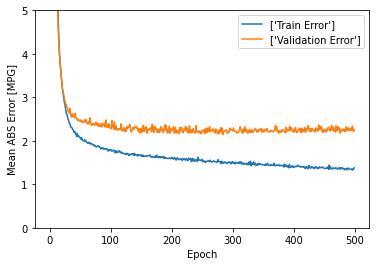

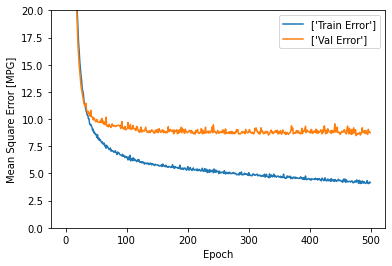

In [19]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean ABS Error [MPG]')
  plt.plot(hist['epoch'], hist['mae'], label=['Train Error'])
  plt.plot(hist['epoch'], hist['val_mae'], label=['Validation Error'])
  plt.ylim([0,5])
  plt.legend()

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [MPG]')
  plt.plot(hist['epoch'], hist['mse'], label=['Train Error'])
  plt.plot(hist['epoch'], hist['val_mse'], label=['Val Error'])
  plt.ylim([0,20])
  plt.legend()
  plt.show()

plot_history(history)

**Observations from the graphs, Overfitting check:**
- Now looking at the above graphs of Number of epochs vs/ training and validation loss, we can say that the number of epochs should be around 50 or less. It is visible that after 50 epochs the validation error increases. This implies overfitting of the model. So, to avoid overfitting need to train till 50 or less epochs

- Will apply Regularization technique (Early stopping) to avoid this overfitting issue

In [20]:
model = build_model()

#applying Early stopping to avoid overfitting of the model:
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(
    normed_train_data, train_labels,                 
    epochs=EPOCHS, validation_split = 0.2, verbose=1, callbacks =[early_stop, PrintDot()])

Epoch 1/500
8/8 [==============================] - 1s 30ms/step - loss: 591.3643 - mae: 23.0504 - mse: 591.3643 - val_loss: 567.4601 - val_mae: 22.4355 - val_mse: 567.4601
Epoch 2/500
8/8 [==============================] - 0s 7ms/step - loss: 547.4954 - mae: 21.9847 - mse: 547.4954 - val_loss: 527.5493 - val_mae: 21.5180 - val_mse: 527.5493
Epoch 3/500
8/8 [==============================] - 0s 8ms/step - loss: 501.7300 - mae: 20.9049 - mse: 501.7300 - val_loss: 486.5789 - val_mae: 20.5365 - val_mse: 486.5789
Epoch 4/500
8/8 [==============================] - 0s 7ms/step - loss: 459.8415 - mae: 20.0064 - mse: 459.8415 - val_loss: 442.5326 - val_mae: 19.4301 - val_mse: 442.5326
Epoch 5/500
8/8 [==============================] - 0s 8ms/step - loss: 417.2260 - mae: 18.9590 - mse: 417.2260 - val_loss: 395.4350 - val_mae: 18.1712 - val_mse: 395.4350
Epoch 6/500
8/8 [==============================] - 0s 7ms/step - loss: 351.5617 - mae: 16.9744 - mse: 351.5617 - val_loss: 345.9610 - val_mae: 1

- After applying regularization, now again plot the Number of epochs vs/ training and validation loss:

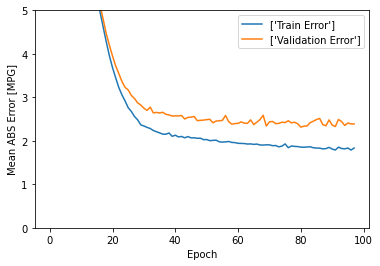

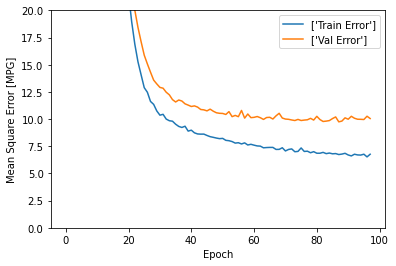

In [21]:
plot_history(history)

**Prediction and Evaluation of the model:**

In [30]:
mse = model.evaluate(normed_test_data, test_labels, verbose=0)
print('Testing set Mean Squared Error:',mse)

Testing set Mean Squared Error: [7.24523401260376, 2.0917744636535645, 7.24523401260376]


- Predictions:

In [23]:
#storing the predictions for both test set and train set
test_pred =  model.predict(normed_test_data).flatten()
train_pred = model.predict(normed_train_data).flatten()

In [28]:
#Computing R-Squares value for both test and train set
import numpy as np
from sklearn.metrics import r2_score

#R2 for test set:
print('Test set R-Squared is:', r2_score(test_labels, test_pred))

#R2 for train set:
print('Train set R-Squared is:', r2_score(train_labels, train_pred))

Test set R-Squared is: 0.8890583561170905
Train set R-Squared is: 0.8805463520177235


In [33]:
#'mean_squared_error' and 'mean_absolute_error' check on both test and train set:
from sklearn.metrics import mean_squared_error, mean_absolute_error

#test set:
print('Test set mse:', mean_squared_error(test_labels, test_pred))
print('Test set mae:', mean_absolute_error(test_labels, test_pred))
print()

#train set:
print('Train set mse:', mean_squared_error(train_labels, train_pred))
print('Train set mae:', mean_absolute_error(train_labels, train_pred))

Test set mse: 7.245234244658631
Test set mae: 2.091774478325477

Train set mse: 7.112489066756949
Train set mae: 1.9056053708313376


**Graph of actual values v/s predicted values:**

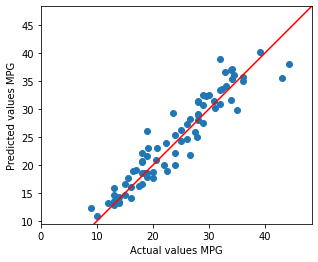

In [27]:
#Plotting actual v/s predicted values
plt.scatter(test_labels, test_pred)
plt.xlabel('Actual values MPG')
plt.ylabel('Predicted values MPG')
plt.axis('equal')
plt.axis('square')
plt.xlim([0, plt.xlim()[1]])
plt.xlim([0, plt.ylim()[1]])
plt.plot([-100,100],[-100,100],color='red')
plt.show()